In [1]:
# Juha Kavka

# Exercise 4


# Import modules (not all are needed in this exercise)
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import math as mt
from scipy.stats import iqr as iqr
import scipy as sc
from scipy import stats as st
df = pd.read_csv("data.txt",sep=",",header=None) # Load data

PCA scatter plot


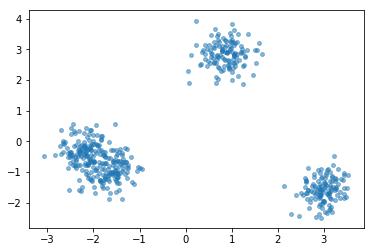

In [2]:
# Part 1

# Use principal component analysis to map the data to 2 dimensions, visualize the data as scatter plot

from sklearn.decomposition import PCA # load PCA from module

X = df.values # data to matrix
XZ= st.zscore(X, axis=0, ddof=1) #Z-score standardization for variables

pca = PCA(n_components=2) # define number of components
X_r2 = pca.fit(XZ).transform(XZ) # fits PCA model for standardized variables

# compose scatter plot for PCA values (two dimensional)
plt.scatter(X_r2[:, 0], X_r2[:, 1],s=15, alpha=.5)

print("PCA scatter plot")

# It can be seen 4 clusters in plotting PCA variables. 2 clusters (left-down corner) seem to be close together.

In [3]:
# Part 2

# Run K-means clustering on the data for different values of K 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=0).fit(XZ)
#kmeans.labels_
#kmeans.cluster_centers_
#kmeans.predict(XZ)
kmeans.score(XZ)
for i in range (2,9):
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(XZ)
    a=silhouette_score(XZ,cluster_labels)
    print ("number of clusters:",i,"silhuette score:",a)

# Maximum silhuette score is founded with 4 clusters.
# K-mean clustering indicates same result (4 clusters) than PCA- analysis.

number of clusters: 2 silhuette score: 0.4290595790127601
number of clusters: 3 silhuette score: 0.5838775801763091
number of clusters: 4 silhuette score: 0.6726765075626703
number of clusters: 5 silhuette score: 0.525554584339825
number of clusters: 6 silhuette score: 0.38587354548225866
number of clusters: 7 silhuette score: 0.25576558398751187
number of clusters: 8 silhuette score: 0.12397831184068511


In [4]:
P=kmeans.predict(XZ) # compose cluster values for variable rows
P = P.reshape((-1, 1)) # shape vector to column vector
N=np.append(X_r2,P, axis=1) # combine cluster values to matrix


PCA scatter plot, 4 clusters with different colors


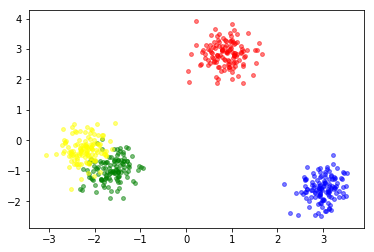

In [5]:
# Devide data to 4 clusters
N1 = N[N[:,2] == 0] # 1. cluster
N2 = N[N[:,2] == 1] # 2. cluster
N3 = N[N[:,2] == 2] # 3. cluster
N4 = N[N[:,2] == 3] # 4. cluster

# Compose scatter plot (PCA 2 dimensional plot with different cluster colors)
plt.scatter(N1[:, 0], N1[:, 1],color='red',s=15, alpha=.5) # 1. cluster
plt.scatter(N2[:, 0], N2[:, 1],color='green',s=15, alpha=.5) # 2. cluster
plt.scatter(N3[:, 0], N3[:, 1],color='blue',s=15, alpha=.5) # 3. cluster
plt.scatter(N4[:, 0], N4[:, 1],color='yellow',s=15, alpha=.5) # 4. cluster

print("PCA scatter plot, 4 clusters with different colors")


# It can be seen that cluster analysis is coherent with PCA- analysis.
# Both methods indicates 4 separate clusters.

explained variance ratio PCA standardidez (first two components): [0.72770452 0.23030523]


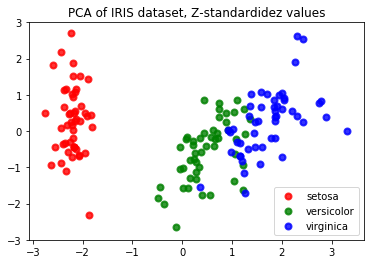

<Figure size 432x288 with 0 Axes>

In [6]:
# Part 3

from sklearn import datasets # loads needed modules


iris = datasets.load_iris() # compose data

X = iris.data # data to matrix
XZ= st.zscore(X, axis=0, ddof=1) #Z-score standardization for variables
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X) # fits PCA model
X_r2 = pca.fit(XZ).transform(XZ) # fits PCA model for standardized variables

plt.figure()
colors = ['red', 'green', 'blue']
lw = 2

# compose scatter plot for PCA values, standardized
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset, Z-standardidez values')

# Percentage of variance explained for each components
print('explained variance ratio PCA standardidez (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()


plt.show() #shows plot


PCA scatter plot, 3 clusters with different colors


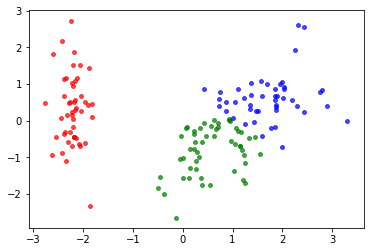

In [7]:
# part 1.

XZ= st.zscore(X, axis=0, ddof=1) #Z-score standardization for variables
kmeans = KMeans(n_clusters=3, random_state=0).fit(XZ)
P=kmeans.predict(XZ) # compose cluster values for variable rows
P = P.reshape((-1, 1)) # shape vector to column vector
N=np.append(X_r2,P, axis=1) 
# Devide data to 4 clusters
N1 = N[N[:,2] == 0] # 1. cluster
N2 = N[N[:,2] == 1] # 2. cluster
N3 = N[N[:,2] == 2] # 3. cluster


# Compose scatter plot (PCA 2 dimensional plot with different cluster colors)
plt.scatter(N1[:, 0], N1[:, 1],color='green',s=15, alpha=.7) # 1. cluster
plt.scatter(N2[:, 0], N2[:, 1],color='red',s=15, alpha=.7) # 2. cluster
plt.scatter(N3[:, 0], N3[:, 1],color='blue',s=15, alpha=.7) # 3. cluster

print("PCA scatter plot, 3 clusters with different colors")
# K-means cluster analysis is coherent with PCA- analysis in Iiris- data.
# All true class labels are founded effectively
# Both scatter plots are very similar.

In [8]:
# part 2

for i in range (2,9):
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(XZ)
    a=silhouette_score(XZ,cluster_labels)
    print ("number of clusters:",i,"silhuette score:",a)
    
# Maximum value of silhuette score is founded with 2 clusters.
# 2 cluster in Iiris- data are so close together that silhuette scoring will not find all clusters.

number of clusters: 2 silhuette score: 0.580184463256302
number of clusters: 3 silhuette score: 0.4621494738890249
number of clusters: 4 silhuette score: 0.38686030299152757
number of clusters: 5 silhuette score: 0.34478573455342093
number of clusters: 6 silhuette score: 0.325936505865698
number of clusters: 7 silhuette score: 0.3346062225746365
number of clusters: 8 silhuette score: 0.3307812667594597


PCA scatter plot, 2 clusters with different colors


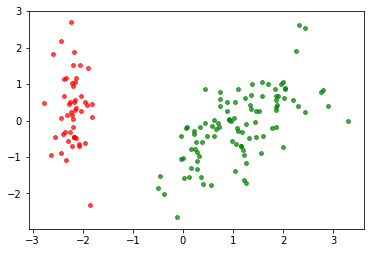

In [9]:
# compose K-means model (2 clusters) for data and draw PCA scatter plot

XZ= st.zscore(X, axis=0, ddof=1) #Z-score standardization for variables
kmeans = KMeans(n_clusters=2, random_state=0).fit(XZ) # fit model to data
P=kmeans.predict(XZ) # compose cluster values for variable rows
P = P.reshape((-1, 1)) # shape vector to column vector
N=np.append(X_r2,P, axis=1) # add cluster predictions to matrix
# Devide data to 2 clusters
N1 = N[N[:,2] == 0] # 1. cluster
N2 = N[N[:,2] == 1] # 2. cluster



# Compose scatter plot (PCA 2 dimensional plot with different cluster colors)
plt.scatter(N1[:, 0], N1[:, 1],color='red',s=15, alpha=.7) # 1. cluster
plt.scatter(N2[:, 0], N2[:, 1],color='green',s=15, alpha=.7) # 2. cluster

print("PCA scatter plot, 2 clusters with different colors")


# Silhuette score is not good indicaton to match real numers of different species in Iris- data.
# It will not found all true class labels.